# Code for an Exploratory Data Analysis based on the King County Housing Dataset

## Setup

### loading the data from the database and saving it in a csv file

In [1]:
import os
from dotenv import load_dotenv
import pandas as pd
from sqlalchemy import create_engine

# read database connection info from .env
load_dotenv()

DB_STRING = os.getenv('DB_STRING')
db = create_engine(DB_STRING)

# import data to pandas dataframe
query_string = "SELECT d.*, s.date, s.price FROM eda.king_county_house_details d FULL OUTER JOIN eda.king_county_house_sales s ON s.house_id = d.id"
df_sqlalchemy = pd.read_sql(query_string, db)

#export data to csv-file
df_sqlalchemy.to_csv('data/eda_housing.csv', index=False)

### creating a dataframe from the csv

In [2]:
#import data from my csv-file
df = pd.read_csv('data/eda_housing.csv')

## Getting an overview on the data

### First and last entries

In [3]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


In [4]:
df.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0
21596,1523300157,2.0,0.75,1020.0,1076.0,2.0,0.0,0.0,3,7,...,0.0,2008,0.0,98144,47.5941,-122.299,1020.0,1357.0,2014-10-15,325000.0


### Features, Entries & Data Types

In [5]:
df.shape

(21597, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [7]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,21534.000000,21597.000000,21597.000000,21597.000000,21145.000000,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,0.233863,3.409825,7.657915,1788.596842,291.857224,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,0.765686,0.650546,1.173200,827.759761,442.490863,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


### Exploring specific features: view, condition, grade, yr_renovated

In [8]:
df.view.sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4., nan])

In [9]:
df.condition.sort_values().unique()

array([1, 2, 3, 4, 5])

In [10]:
df.grade.sort_values().unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [11]:
df.yr_renovated.sort_values().unique()

array([    0., 19340., 19400., 19440., 19450., 19460., 19480., 19500.,
       19510., 19530., 19540., 19550., 19560., 19570., 19580., 19590.,
       19600., 19620., 19630., 19640., 19650., 19670., 19680., 19690.,
       19700., 19710., 19720., 19730., 19740., 19750., 19760., 19770.,
       19780., 19790., 19800., 19810., 19820., 19830., 19840., 19850.,
       19860., 19870., 19880., 19890., 19900., 19910., 19920., 19930.,
       19940., 19950., 19960., 19970., 19980., 19990., 20000., 20010.,
       20020., 20030., 20040., 20050., 20060., 20070., 20080., 20090.,
       20100., 20110., 20120., 20130., 20140., 20150.,    nan])

### Small Data Overview

Data Overview: 
- there are 1-33 bedrooms, 1/2 to 8 bathrooms (what is 1/2?); floors 1-3.5
- the living space ranges from 370 to 13540 sqft (roughly 37 to 1354 sqm2)
--- sqft_above 370-9410, basement 0-4820 ---> yep this is binary describing the living space. 
- property size ranges from 520 to 1,651,358 sqft (roughly 52 to 165,136 sqm2)
- waterfronts y/n
- view 0-4; condition? 1-5; grade? 3-13
- year built 1900-2015, renovated never(0) - 2015
- zipcode 98118-98199 - where is this exactly?; lat 47.1559-47.7776; long -122.519-121.315
- sqft_living15 399-6210, sqftlot15 651-871200
- selling_date:2014-05-02 - 2014-05-27
- selling price 78,000-7,700000

## Data Cleaning

### Renaming columns/features for more clarity

In [12]:
df.rename(columns={'date': 'selling_date', 'price': 'selling_price'}, inplace=True)
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,selling_date,selling_price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


### Redefine dtype for waterfront, view, condition, grade, yrs, zipcode

In [13]:
df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [14]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,selling_date,selling_price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


### Selling_date to_datetime

In [15]:
df.selling_date = pd.to_datetime(df.selling_date)
df.selling_date.info

<bound method Series.info of 0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: selling_date, Length: 21597, dtype: datetime64[ns]>

### Clean yr_renovated

In [16]:
# reformat yr_renovated: remove 0
# divide by 10 for any years that are beyond 2100
df.yr_renovated = df.yr_renovated.where(df.yr_renovated < 2100, df.yr_renovated //10)

In [17]:
# check existing entries
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [18]:
# fill nans with yr_built, since that is when the house was last new
df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])
df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,selling_date,selling_price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,1933.0,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0


In [19]:
# fill 0 with yr_built
df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df['yr_built']
df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,selling_date,selling_price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,1955.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,1933.0,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,1965.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,1987.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,0.0,2009,2009.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,0.0,2014,2014.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,0.0,2009,2009.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,0.0,2004,2004.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0


In [20]:
# check whether nans and 0 are gone
df.yr_renovated.unique()

array([1955., 1991., 1933., 1965., 1987., 2001., 1995., 1963., 1960.,
       2003., 1942., 1927., 1977., 1900., 1979., 1994., 1916., 1921.,
       1969., 1947., 1968., 1985., 1941., 1915., 1909., 1948., 2005.,
       1929., 1981., 2002., 1904., 1996., 2000., 1984., 2014., 1922.,
       1959., 1966., 1953., 1950., 2008., 1954., 1973., 1925., 1989.,
       1972., 1986., 1956., 1992., 1964., 1952., 1961., 2006., 1988.,
       1962., 1939., 1967., 1975., 1980., 1910., 1983., 2010., 1978.,
       1905., 1971., 1945., 1924., 1990., 1926., 2004., 1923., 2007.,
       2013., 1976., 1949., 1999., 1901., 1993., 1920., 1997., 1943.,
       1940., 1918., 1928., 1974., 1911., 1930., 1936., 1937., 1982.,
       1908., 1931., 1957., 1998., 1913., 1907., 1958., 2011., 2012.,
       1912., 1917., 1946., 1951., 1932., 1944., 1902., 2009., 1970.,
       2015., 1934., 1938., 1919., 1914., 1906., 1903., 1935.])

In [21]:
# transform into int format
df.yr_renovated = df.yr_renovated.astype(int)
df.yr_renovated.dtype

dtype('int64')

## Research Question 1: What is the best time of the year to sell for best profits? 
## Hypothesis 1: For expensive houses in the center, average price/sqft  (>5%) is higher in the summer months of the year (May-September).

### Definitions & creating a new filtered data set: df_c_exp

#### Creating a new filtered dataframe: **df_center**

In the center in this context, pertains to locations within Seattle. Anything beyond can be filtered out.
For simplification, I will go for Seattle city = center.
Seattle has the ZIP codes 98101-98199. This filters for 8973/21597 entries.

In [22]:
# exploring zipcode values
df.zipcode.sort_values()

3109     98001
15442    98001
10209    98001
2357     98001
5950     98001
         ...  
15548    98199
9140     98199
3084     98199
7376     98199
17941    98199
Name: zipcode, Length: 21597, dtype: int64

In [23]:
df.zipcode.describe()

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [24]:
# creating a new filtered dataframe having only entries with Seattle Zipcode
df_center = df.query('zipcode >= 98101')
df_center = df_center.sort_values('zipcode').reset_index(drop=True)
df_center

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,selling_date,selling_price
0,2025049203,2.0,1.00,710.0,1157.0,2.0,NaN,0.0,4,7,...,0.0,1943,1943,98102,47.6413,-122.329,1370.0,1173.0,2014-06-10,399950.0
1,1952200240,3.0,2.50,2070.0,13241.0,1.5,0.0,0.0,5,9,...,800.0,1910,1910,98102,47.6415,-122.315,2200.0,4500.0,2014-06-11,850830.0
2,9390700100,2.0,1.75,1150.0,2723.0,1.0,0.0,0.0,4,7,...,380.0,1923,1923,98102,47.6357,-122.322,1440.0,4000.0,2014-09-10,390000.0
3,2902201300,2.0,1.75,1180.0,904.0,2.0,0.0,0.0,3,10,...,400.0,2014,2014,98102,47.6396,-122.329,1380.0,3610.0,2014-12-29,659000.0
4,2025049206,2.0,1.00,710.0,1131.0,2.0,0.0,0.0,4,7,...,0.0,1943,1943,98102,47.6413,-122.329,1370.0,1173.0,2014-06-11,399950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,871001484,3.0,1.75,1800.0,5816.0,1.0,0.0,0.0,5,7,...,900.0,1947,1947,98199,47.6529,-122.407,1650.0,5816.0,2015-01-15,719000.0
8969,573000490,3.0,2.25,1970.0,4564.0,1.0,0.0,0.0,3,8,...,500.0,1959,1959,98199,47.6703,-122.410,1980.0,5000.0,2014-11-24,625000.0
8970,5037300130,3.0,1.75,1580.0,5750.0,1.0,0.0,2.0,4,8,...,250.0,1947,1947,98199,47.6339,-122.392,2480.0,5750.0,2015-05-04,672500.0
8971,6821101765,4.0,1.75,1780.0,2788.0,1.0,0.0,0.0,4,6,...,890.0,1943,1943,98199,47.6511,-122.400,1760.0,5664.0,2014-06-21,442900.0


#### creating a new filtered dataframe for central and expensive houses: **df_c_exp**

For the purposes of this analysis, I choose to define expensive as any central houses where the selling_price starts from Q3 (third quartile).
This is any house more expensive than 630,000.
I assume that by expensive, the client means total selling_price, not price/sqft, because it is the broadest definition of expensive.

##### exploring expensive houses

In [25]:
# checking the concrete statistical data on prices in the center
df_center.selling_price.describe()

count    8.973000e+03
mean     5.350856e+05
std      3.405186e+05
min      7.800000e+04
25%      3.370000e+05
50%      4.530000e+05
75%      6.300000e+05
max      7.700000e+06
Name: selling_price, dtype: float64

In [26]:
# creating an ordered price series for plotting
df_center_price = df_center.selling_price.sort_values()
df_center_price

7521      78000.0
7499      81000.0
6554      82000.0
7646      82500.0
7677      83000.0
          ...    
6219    3600000.0
908     3650000.0
7894    3800000.0
6896    4500000.0
38      7700000.0
Name: selling_price, Length: 8973, dtype: float64

<Axes: ylabel='Frequency'>

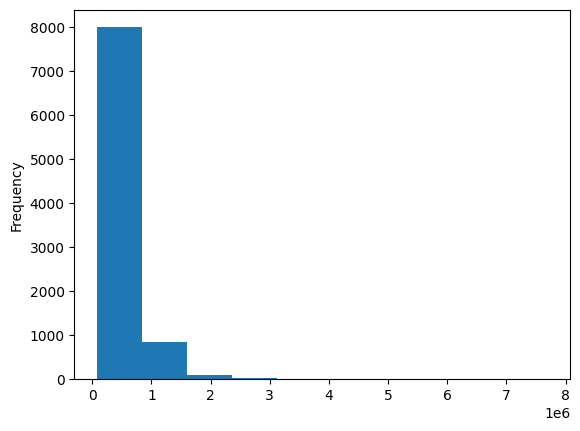

In [27]:
# showing the distribution of prices as frequencies: 
# houses between up to 900,000 are frequent, up to 1,500,000 still noticeable
df_center_price.plot(kind='hist')

<Axes: >

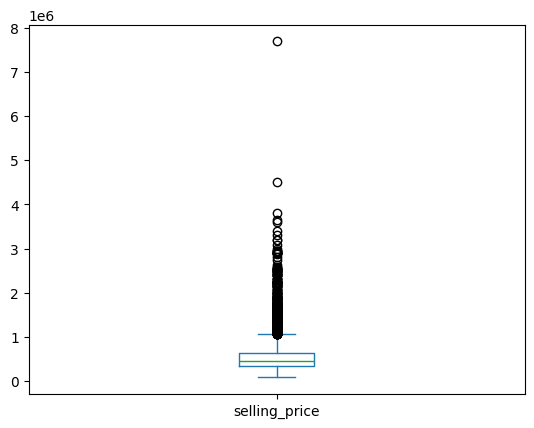

In [28]:
# showing the distribution of quartiles and outliers.
# "expensive" is defined as anything from the upper quartile, i.e.: 645000.
# that would be the upper 25% of the houses.
# option: look at the distribution within, and starting from another percentile makes even more sense.
# does it make sense to look at price/sqft? here, no. Since size is one factor to be considered in making the house expensive.

df_center_price.plot(kind='box')

<Axes: ylabel='Density'>

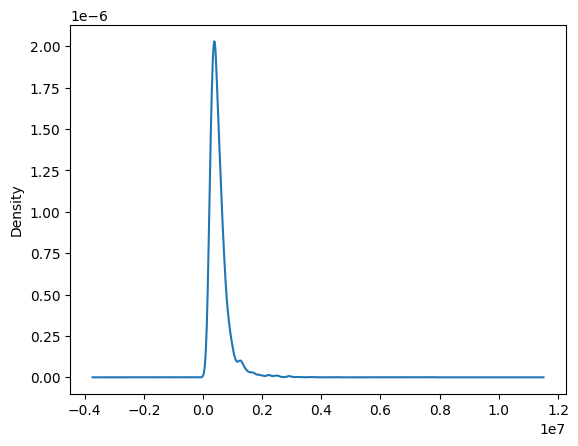

In [29]:
# one more exploration, showing the price distribution
df_center_price.plot(kind='kde')

##### Creating df_exp

In [30]:
# creating a new filtered dataframe for central and expensive housees: **df_c_exp**
# narrowing down data entries to 2255
q3 = df_center.selling_price.quantile(0.75)
df_c_exp = df_center.query('selling_price >= @q3').reset_index(drop=True)
df_c_exp

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,selling_date,selling_price
0,1952200240,3.0,2.50,2070.0,13241.0,1.5,0.0,0.0,5,9,...,800.0,1910,1910,98102,47.6415,-122.315,2200.0,4500.0,2014-06-11,850830.0
1,2902201300,2.0,1.75,1180.0,904.0,2.0,0.0,0.0,3,10,...,400.0,2014,2014,98102,47.6396,-122.329,1380.0,3610.0,2014-12-29,659000.0
2,1964700054,3.0,2.50,1660.0,1344.0,3.0,NaN,0.0,3,8,...,0.0,2008,2008,98102,47.6440,-122.327,1750.0,2040.0,2014-12-22,975000.0
3,6848200475,3.0,1.50,1870.0,3300.0,2.0,0.0,2.0,3,7,...,0.0,1906,1906,98102,47.6221,-122.325,1820.0,2460.0,2014-11-26,933000.0
4,2025049175,2.0,2.50,1360.0,2070.0,2.0,0.0,0.0,3,8,...,0.0,1999,1999,98102,47.6423,-122.329,1920.0,2092.0,2015-01-05,755000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,1370803510,3.0,1.75,1790.0,6117.0,1.0,0.0,2.0,3,8,...,440.0,1940,1940,98199,47.6366,-122.401,1960.0,5554.0,2014-05-15,790000.0
2251,1025039086,3.0,2.50,3280.0,29111.0,2.0,1.0,3.0,3,11,...,0.0,1925,1925,98199,47.6699,-122.416,3530.0,21074.0,2014-09-16,1880000.0
2252,871001484,3.0,1.75,1800.0,5816.0,1.0,0.0,0.0,5,7,...,900.0,1947,1947,98199,47.6529,-122.407,1650.0,5816.0,2015-01-15,719000.0
2253,5037300130,3.0,1.75,1580.0,5750.0,1.0,0.0,2.0,4,8,...,250.0,1947,1947,98199,47.6339,-122.392,2480.0,5750.0,2015-05-04,672500.0


### Create new dataframe for exploring the time dependency of selling_price/sqft: **df_sales**

#### Create df_sales

In [31]:
df_sales = df_c_exp[['selling_date', 'selling_price', 'sqft_living', 'sqft_lot']].sort_values('selling_date')
df_sales = df_sales.reset_index(drop=True)
df_sales

,selling_date,selling_price,sqft_living,sqft_lot
0,2014-05-02,805000.0,2710.0,4500.0
1,2014-05-02,750000.0,2390.0,6550.0
2,2014-05-02,750000.0,2240.0,10578.0
3,2014-05-02,1200000.0,2910.0,9480.0
4,2014-05-02,650000.0,1820.0,5000.0
...,...,...,...,...
2250,2015-05-13,645000.0,1640.0,4218.0
2251,2015-05-14,855000.0,1900.0,4000.0
2252,2015-05-14,725000.0,1980.0,5850.0
2253,2015-05-14,1700000.0,3320.0,5354.0


In [32]:
# Add new columns for price per square foot
df_sales['price_per_sqft_living'] = df_sales['selling_price'] / df_sales['sqft_living']
df_sales['price_per_sqft_lot'] = df_sales['selling_price'] / df_sales['sqft_lot']

# Display the updated DataFrame
df_sales

,selling_date,selling_price,sqft_living,sqft_lot,price_per_sqft_living,price_per_sqft_lot
0,2014-05-02,805000.0,2710.0,4500.0,297.047970,178.888889
1,2014-05-02,750000.0,2390.0,6550.0,313.807531,114.503817
2,2014-05-02,750000.0,2240.0,10578.0,334.821429,70.901872
3,2014-05-02,1200000.0,2910.0,9480.0,412.371134,126.582278
4,2014-05-02,650000.0,1820.0,5000.0,357.142857,130.000000
...,...,...,...,...,...,...
2250,2015-05-13,645000.0,1640.0,4218.0,393.292683,152.916074
2251,2015-05-14,855000.0,1900.0,4000.0,450.000000,213.750000
2252,2015-05-14,725000.0,1980.0,5850.0,366.161616,123.931624
2253,2015-05-14,1700000.0,3320.0,5354.0,512.048193,317.519612


In [33]:
df_sales.describe()

,selling_date,selling_price,sqft_living,sqft_lot,price_per_sqft_living,price_per_sqft_lot
count,2255,2.255000e+03,2255.000000,2255.000000,2255.000000,2255.000000
mean,2014-10-30 01:50:28.470066176,9.485286e+05,2572.026608,6943.890466,380.411712,188.167018
min,2014-05-02 00:00:00,6.300000e+05,890.000000,520.000000,106.951872,5.185699
25%,2014-07-17 00:00:00,7.000000e+05,1940.000000,4035.500000,301.003680,118.050127
50%,2014-10-17 00:00:00,8.000000e+05,2440.000000,5163.000000,365.448505,162.885662
75%,2015-02-24 00:00:00,1.010000e+06,3020.000000,7200.000000,437.136494,224.270613
max,2015-05-27 00:00:00,7.700000e+06,12050.000000,136915.000000,810.138889,2019.704433
std,NaN,4.348246e+05,907.190342,7007.751049,110.969640,124.751611


#### Excursus: exploring some price dependencies via scatterplot

The following graphs show in particular, that there is a significant correlation between selling price and sqft_living. 
For exploring time dependency of selling_price, sqft_living will therefore be factored out. 
There is likely no linear relationship between the absolute price and time, but there might be between price/sqft and time.
The hypothesis: People might be willing to pay more or less per sqft with varying months.

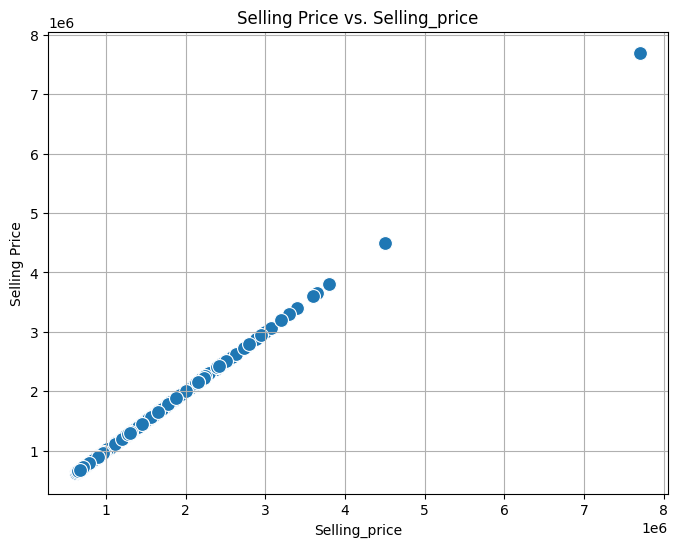

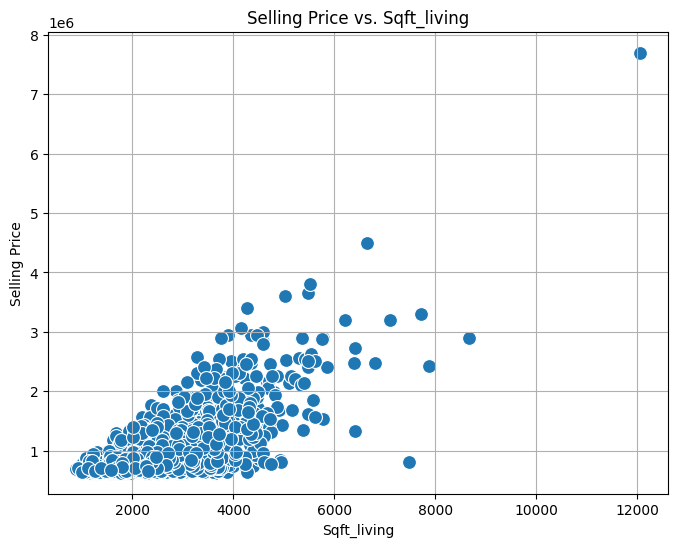

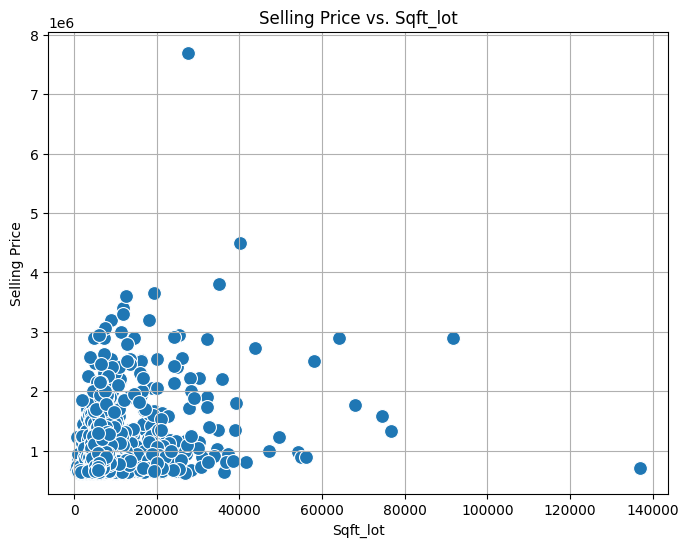

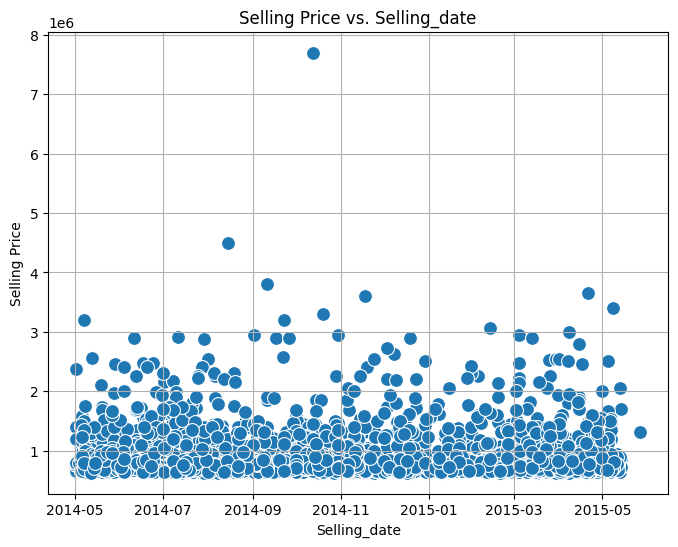

In [34]:
# correlations of focus features for now
import seaborn as sns
import matplotlib.pyplot as plt
variables = df_c_exp[['selling_price', 'sqft_living', 'sqft_lot', 'selling_date']]
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_c_exp, x=var, y='selling_price', edgecolor='w', s=100)
    plt.title(f'Selling Price vs. {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Selling Price')
    plt.grid(True)
    plt.show()

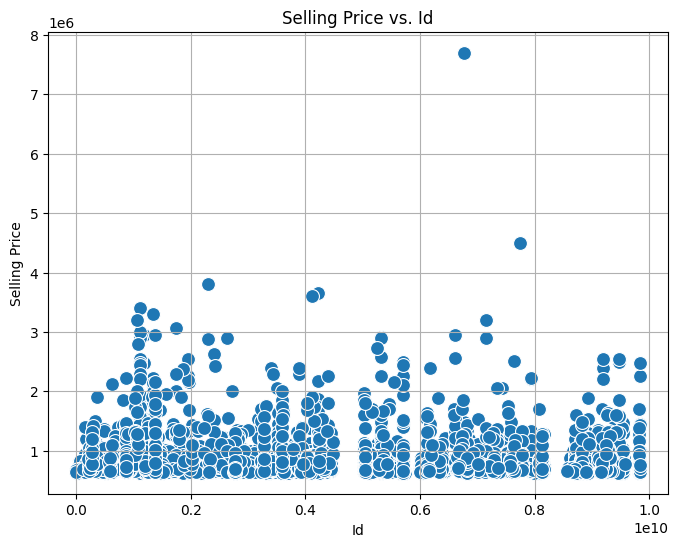

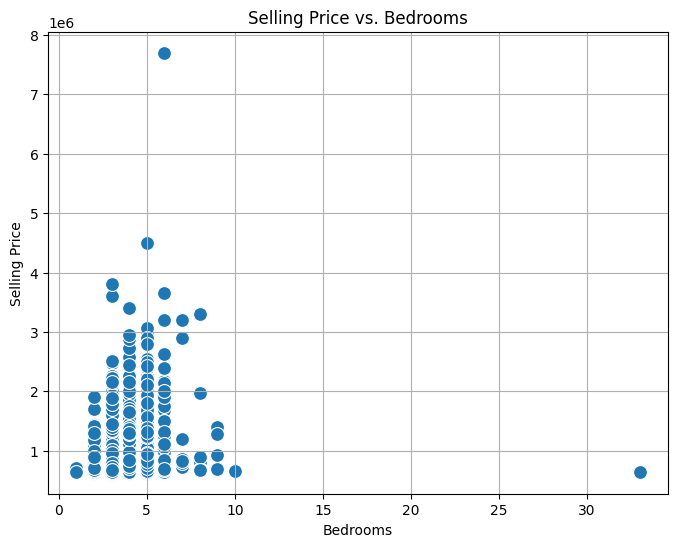

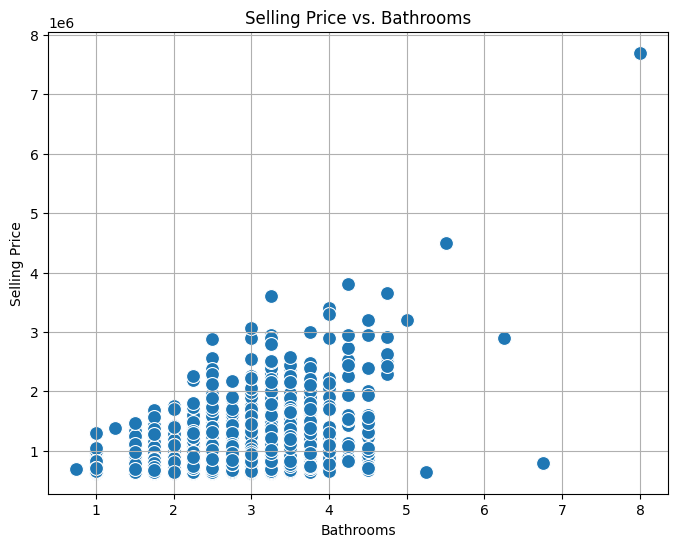

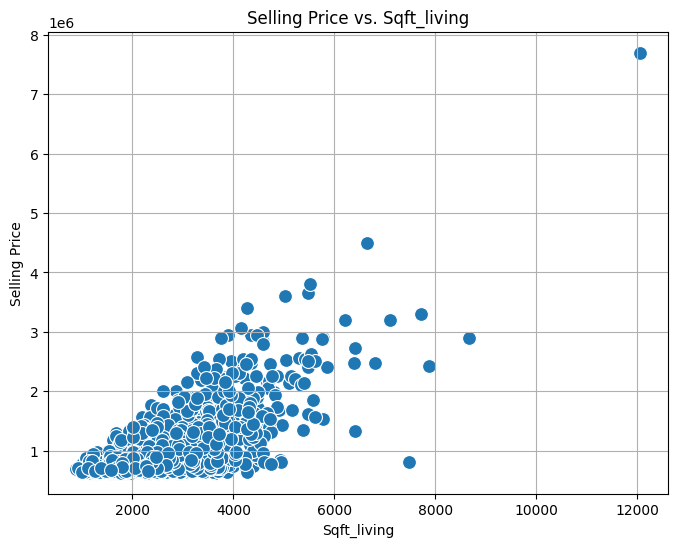

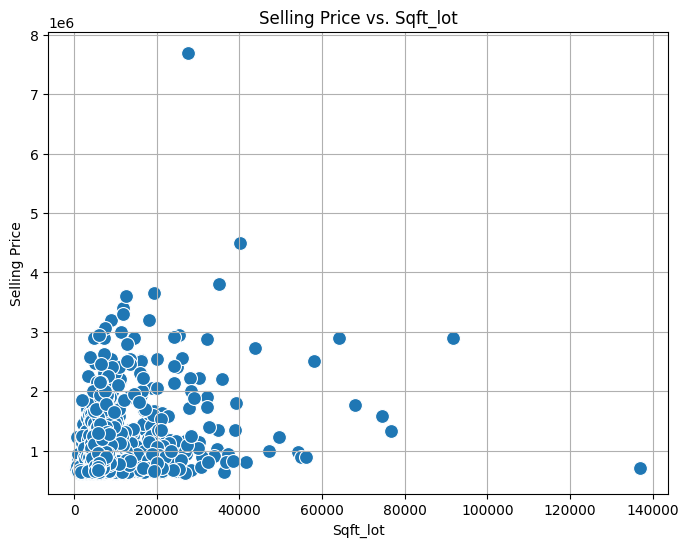

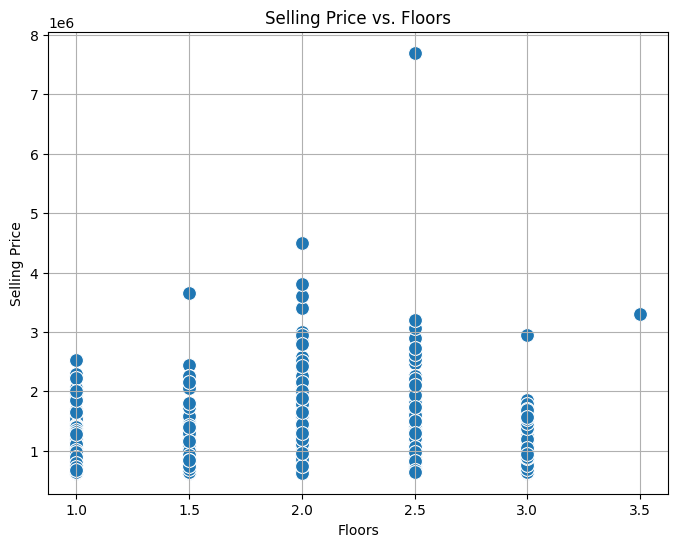

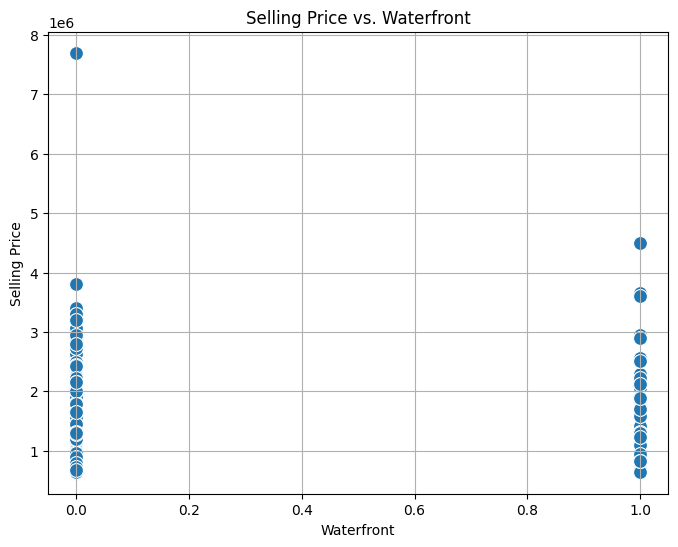

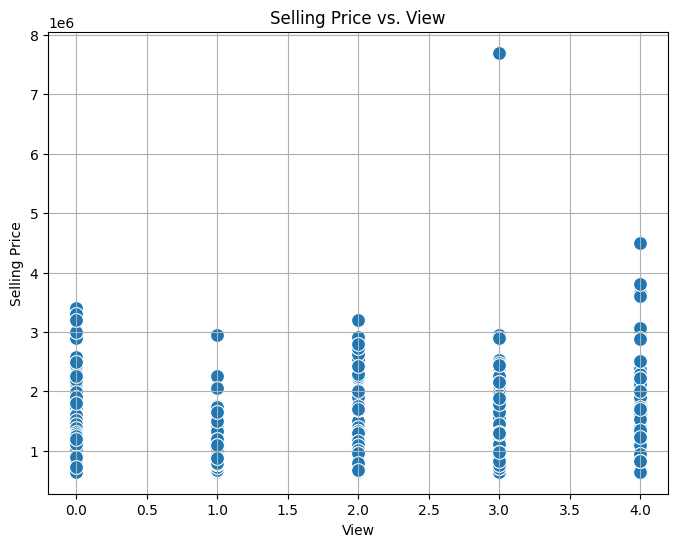

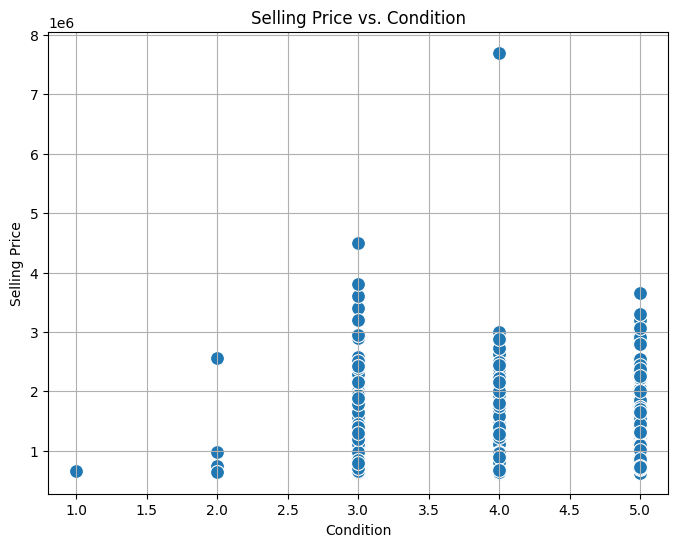

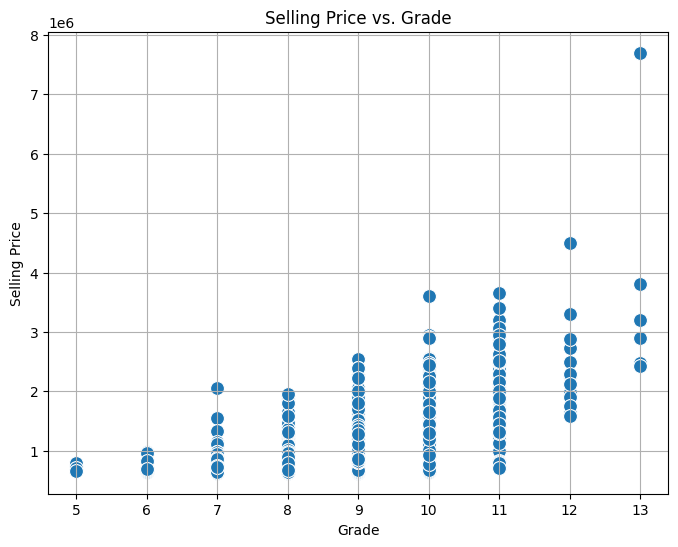

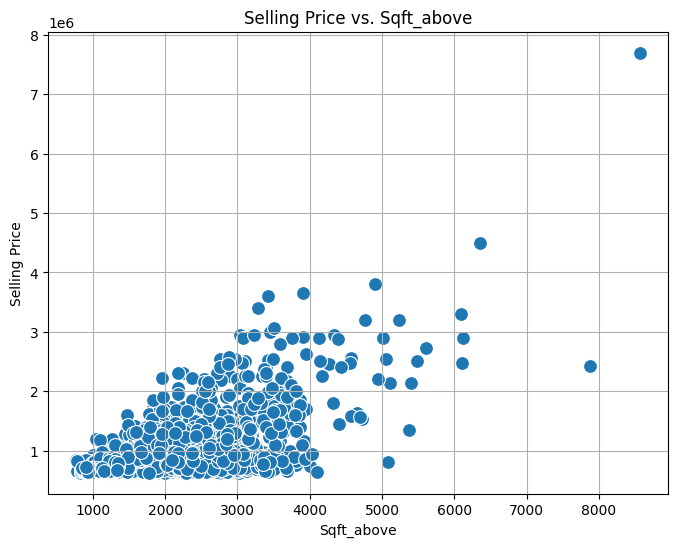

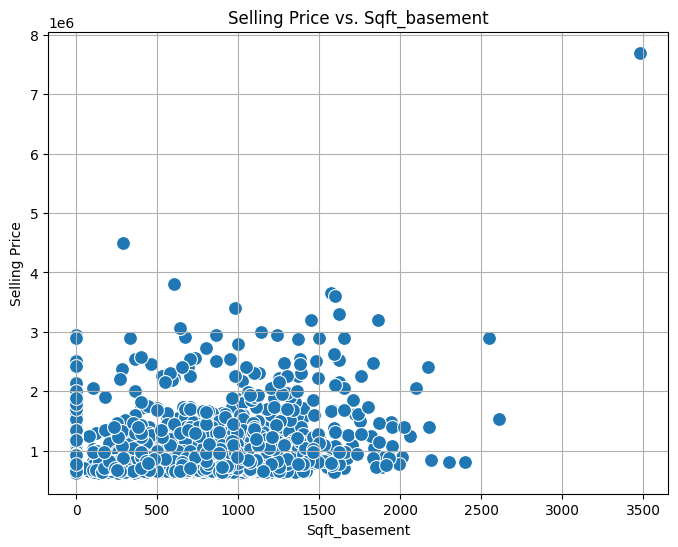

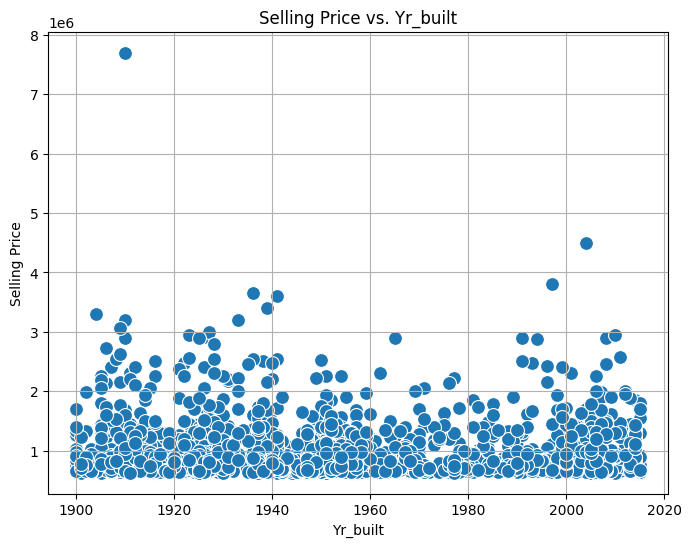

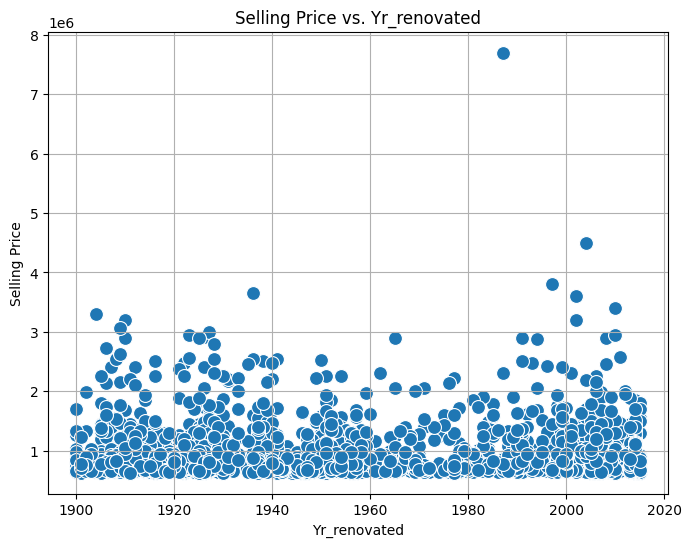

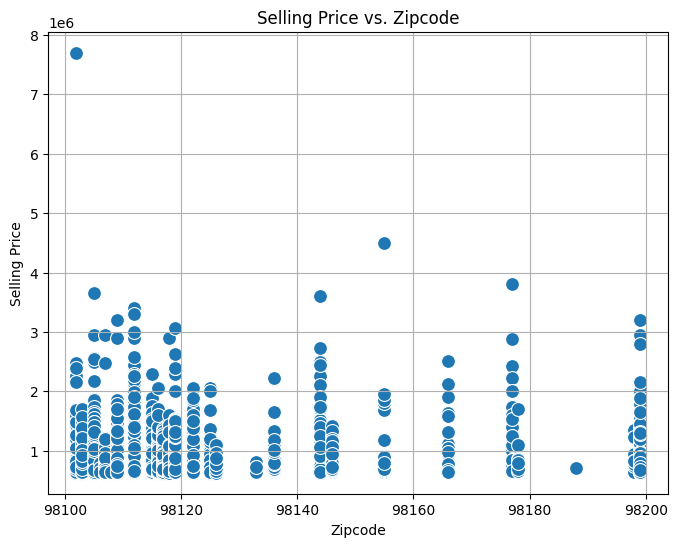

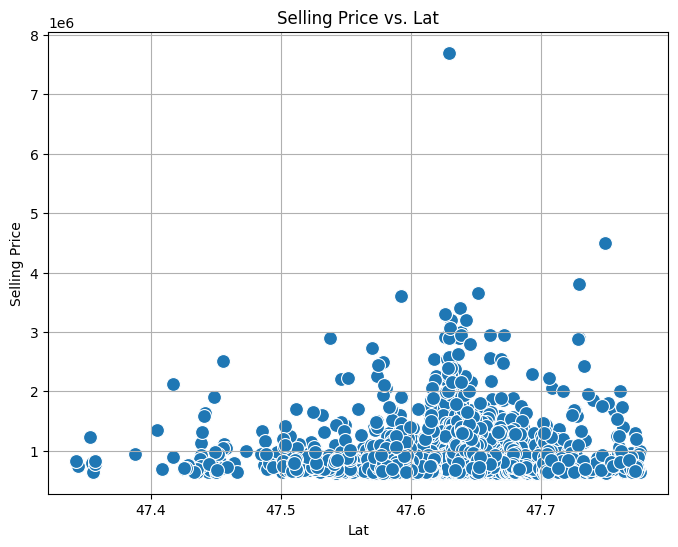

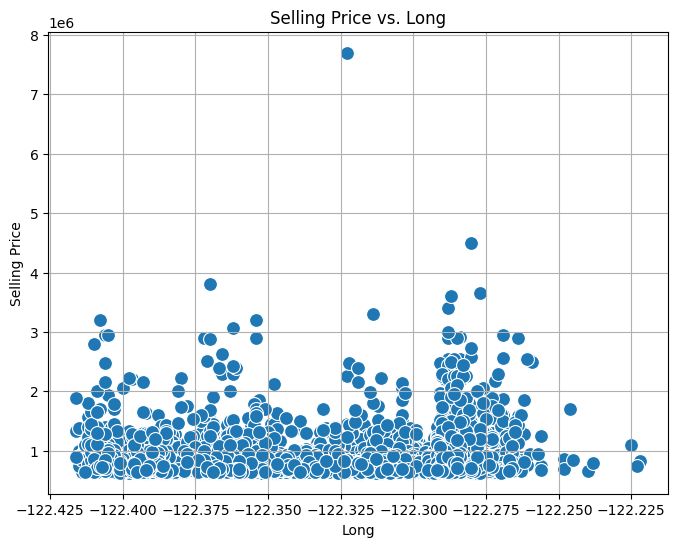

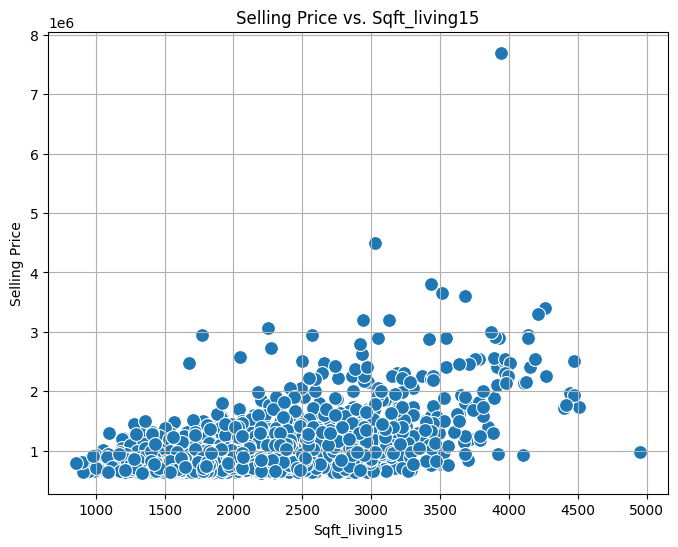

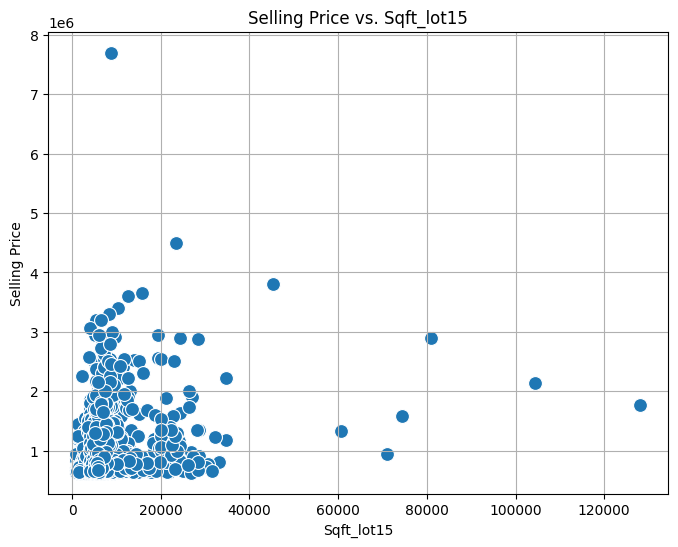

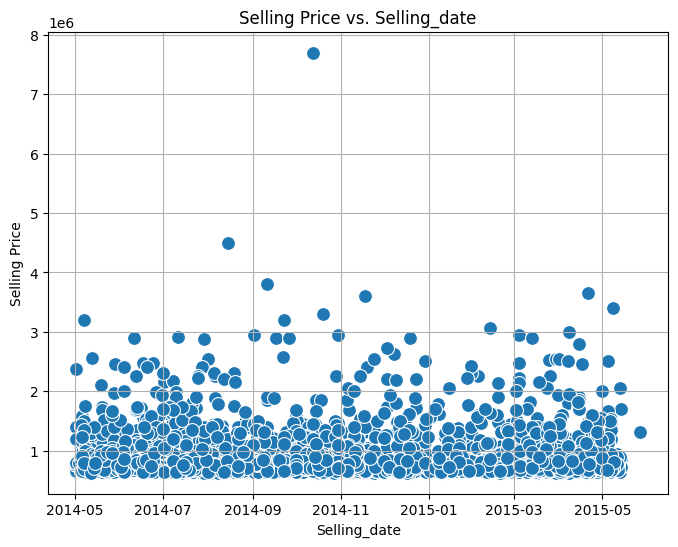

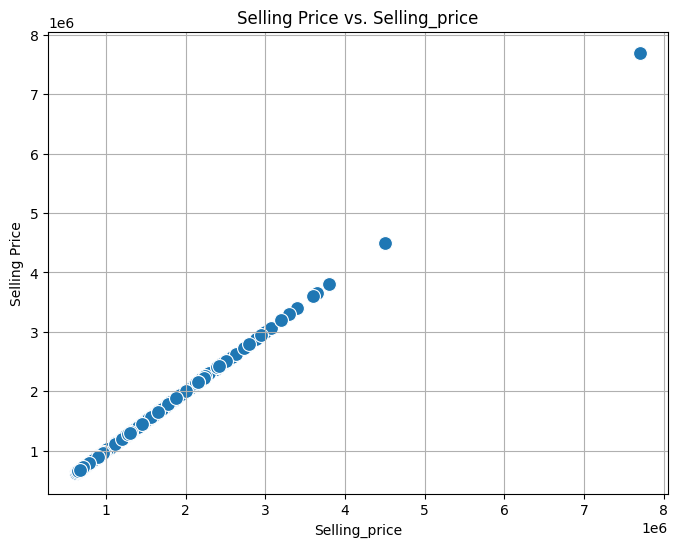

In [35]:
# correlation of all features vs selling_price
import seaborn as sns
import matplotlib.pyplot as plt
variables = df_c_exp.columns
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_c_exp, x=var, y='selling_price', edgecolor='w', s=100)
    plt.title(f'Selling Price vs. {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Selling Price')
    plt.grid(True)
    plt.show()

In [36]:
# showing that selling_price & sqft_living has a high (the highest) correlation (Pearson)
df_c_exp[['selling_price', 'sqft_living']].corr()

,selling_price,sqft_living
selling_price,1.000000,0.689162
sqft_living,0.689162,1.000000


In [37]:
df_c_exp[['selling_price', 'sqft_lot']].corr()

,selling_price,sqft_lot
selling_price,1.000000,0.302346
sqft_lot,0.302346,1.000000


In [38]:
# additional calculatation of numerical Pearson correlation for each variable with selling_price
# caveat: correlation is being performed with some categorical variables; in further analyses, this method needs to be refined.
# result for now: highest correlation betw selling_price and sqft_living
variables = df_c_exp.columns
for var in variables:
    print(f"Corr selling_price & {var}: {df_c_exp[['selling_price', var]].corr()}")

Corr selling_price & id:                selling_price       id
selling_price        1.00000 -0.06837
id                  -0.06837  1.00000
Corr selling_price & bedrooms:                selling_price  bedrooms
selling_price       1.000000  0.174748
bedrooms            0.174748  1.000000
Corr selling_price & bathrooms:                selling_price  bathrooms
selling_price       1.000000   0.471907
bathrooms           0.471907   1.000000
Corr selling_price & sqft_living:                selling_price  sqft_living
selling_price       1.000000     0.689162
sqft_living         0.689162     1.000000
Corr selling_price & sqft_lot:                selling_price  sqft_lot
selling_price       1.000000  0.302346
sqft_lot            0.302346  1.000000
Corr selling_price & floors:                selling_price    floors
selling_price       1.000000  0.247897
floors              0.247897  1.000000
Corr selling_price & waterfront:                selling_price  waterfront
selling_price       1.000000    0

### Show prices/sqft over time

<Axes: xlabel='selling_date'>

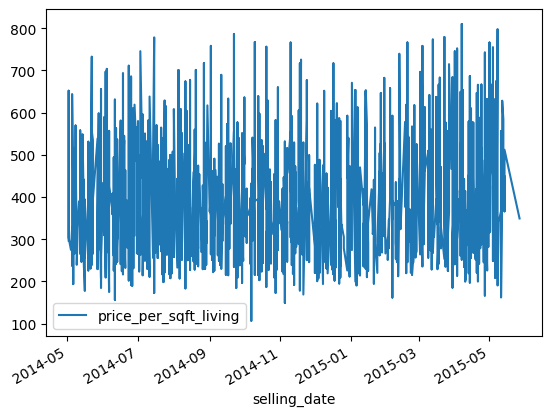

In [39]:
# daily sales prices/sqft over time in a lineplot
df_sales.plot.line(x='selling_date', y='price_per_sqft_living')

<Axes: xlabel='selling_date'>

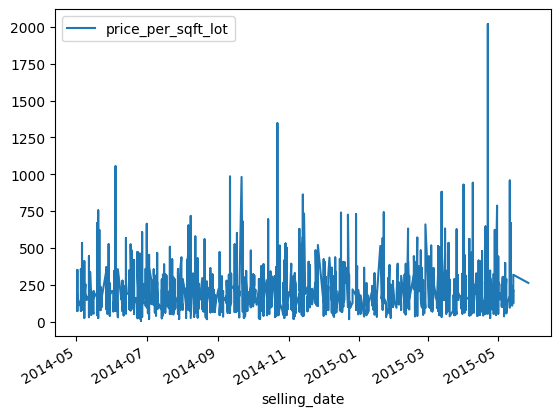

In [40]:
# daily sales prices/sqft over time, price/sqft_lot as comparison
df_sales.plot.line(x='selling_date', y='price_per_sqft_lot')

#### Bin entries into months; compare average prices per month

In [41]:
df_sales['year_month'] = df_sales['selling_date'].dt.to_period('M')  
df_sales

,selling_date,selling_price,sqft_living,sqft_lot,price_per_sqft_living,price_per_sqft_lot,year_month
0,2014-05-02,805000.0,2710.0,4500.0,297.047970,178.888889,2014-05
1,2014-05-02,750000.0,2390.0,6550.0,313.807531,114.503817,2014-05
2,2014-05-02,750000.0,2240.0,10578.0,334.821429,70.901872,2014-05
3,2014-05-02,1200000.0,2910.0,9480.0,412.371134,126.582278,2014-05
4,2014-05-02,650000.0,1820.0,5000.0,357.142857,130.000000,2014-05
...,...,...,...,...,...,...,...
2250,2015-05-13,645000.0,1640.0,4218.0,393.292683,152.916074,2015-05
2251,2015-05-14,855000.0,1900.0,4000.0,450.000000,213.750000,2015-05
2252,2015-05-14,725000.0,1980.0,5850.0,366.161616,123.931624,2015-05
2253,2015-05-14,1700000.0,3320.0,5354.0,512.048193,317.519612,2015-05


In [42]:
# Extract year and month; group by various aggregate functions, for sqft_living and sqft_lot as comparison
monthly_sales_sqft_living = df_sales.groupby('year_month')['price_per_sqft_living'].agg(['mean', 'std', 'count', 'median']).reset_index()

monthly_sales_sqft_lot = df_sales.groupby('year_month')['price_per_sqft_lot'].agg(['mean', 'std', 'count', 'median']).reset_index()

print(monthly_sales_sqft_living)
print(monthly_sales_sqft_lot)

   year_month        mean         std  count      median
0     2014-05  370.893607   96.349305    193  357.142857
1     2014-06  376.737745  109.292153    241  363.945578
2     2014-07  376.394149  103.167039    226  368.881138
3     2014-08  361.593968  101.910740    192  336.957979
4     2014-09  374.447684  104.233582    175  360.020141
5     2014-10  375.754488  105.439187    200  359.556705
6     2014-11  373.420946  113.858655    142  356.745171
7     2014-12  367.642051  111.136551    148  354.882258
8     2015-01  372.508496  121.931505     94  349.555075
9     2015-02  369.292758  114.283858    104  364.605735
10    2015-03  401.045344  119.147425    199  382.845188
11    2015-04  402.619865  116.273577    266  387.057256
12    2015-05  433.571144  131.538807     75  410.447761
   year_month        mean         std  count      median
0     2014-05  182.843669  112.827027    193  159.022273
1     2014-06  185.756772  113.820351    241  165.498442
2     2014-07  182.140983   95.

In [43]:
# explore the min and max of the respective months for the median
monthly_sales_sqft_living['median'].describe()

count     13.000000
mean     365.587911
std       18.694661
min      336.957979
25%      356.745171
50%      360.020141
75%      368.881138
max      410.447761
Name: median, dtype: float64

In [44]:
# explore the min and max of the respective months for the mean
monthly_sales_sqft_living['mean'].describe()

count     13.000000
mean     381.224788
std       19.718661
min      361.593968
25%      370.893607
50%      374.447684
75%      376.737745
max      433.571144
Name: mean, dtype: float64

In [45]:
# analysis for summer, in particular summer mean/median
df_sales.query("'2014-05-01' <= selling_date <= '2014-09-30' or selling_date >= '2015-05-01'")['price_per_sqft_living'].describe()

count    1102.000000
mean      376.509585
std       106.518568
min       156.470588
25%       299.342278
50%       360.437691
75%       433.756034
max       798.122066
Name: price_per_sqft_living, dtype: float64

In [46]:
# corresponding analysis for rest of year
df_sales.query("selling_date < '2014-05-01' or '2014-09-30' < selling_date < '2015-05-01'")['price_per_sqft_living'].describe()

count    1153.000000
mean      384.141239
std       114.985488
min       106.951872
25%       303.030303
50%       370.930233
75%       441.436464
max       810.138889
Name: price_per_sqft_living, dtype: float64

<Axes: xlabel='year_month'>

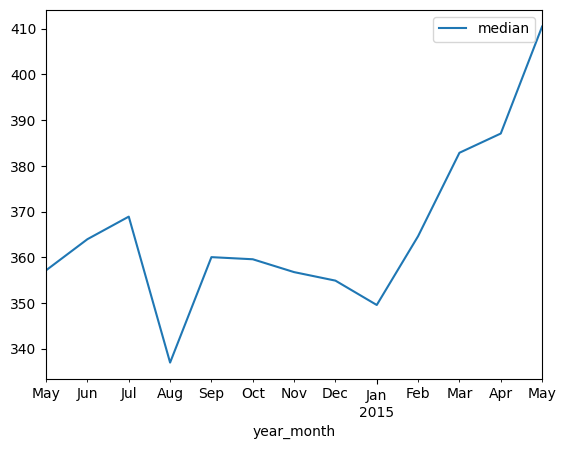

In [47]:
# plotting median price/sqft_living per month
monthly_sales_sqft_living.plot.line(x='year_month', y='median')

<Axes: xlabel='year_month'>

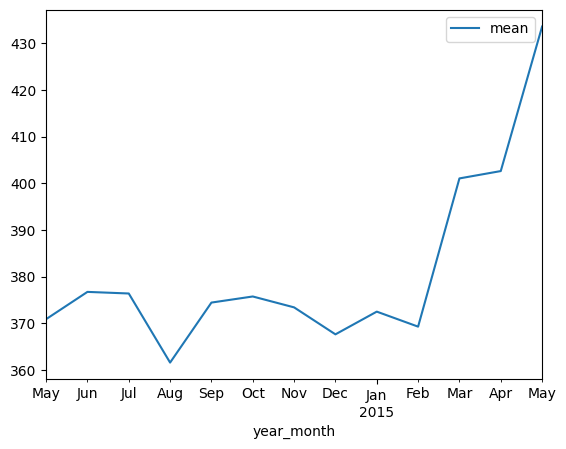

In [48]:
# plotting mean price/sqft_living per month
monthly_sales_sqft_living.plot.line(x='year_month', y='mean')

<Axes: xlabel='year_month'>

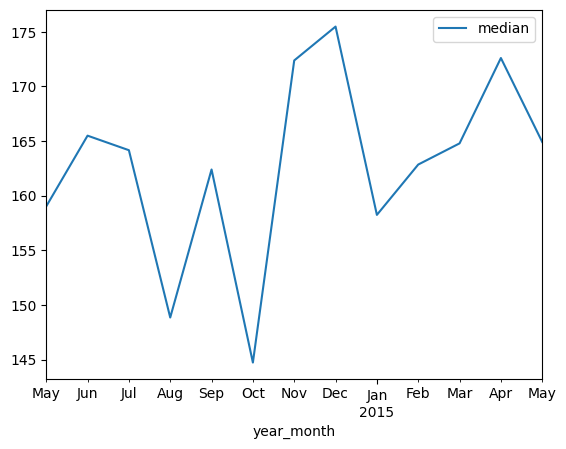

In [105]:
# plotting median price/sqft_lot per month for comparison
monthly_sales_sqft_lot.plot.line(x='year_month', y='median')

<Axes: xlabel='year_month'>

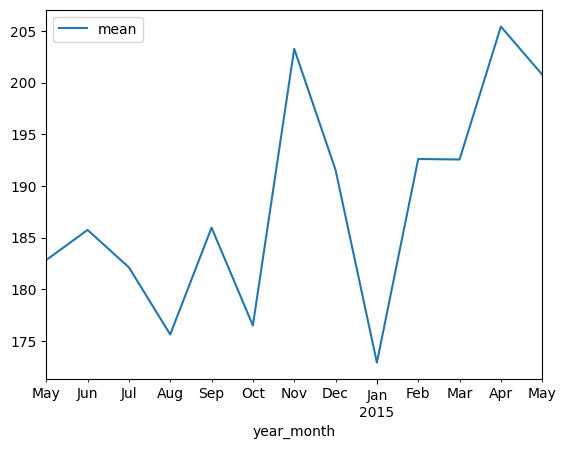

In [50]:
# plotting mean price/sqft_lot per month for comparison
monthly_sales_sqft_lot.plot.line(x='year_month', y='mean')

## Research Question 2: Does renovation increase profit?
## Hypothesis 2: For expensive houses in the center, renovation allows for a significant (>15% increase) in price/sqft.

### Excursus: having a look at houses that got built or renovated after they got sold

In [63]:
# houses that got renovated after being sold, from df_ex_exp
df_c_exp.query('selling_date.dt.year - yr_renovated == -1')

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,selling_date,selling_price
1961,3585900190,3.0,2.50,3400.0,38400.0,1.0,0.0,4.0,3,8,...,1530.0,1955,2015,98177,47.7611,-122.372,3400.0,24338.0,2014-10-06,825000.0
2040,3585900665,5.0,2.50,4600.0,19831.0,1.0,0.0,3.0,3,9,...,2300.0,1956,2015,98177,47.7608,-122.378,2890.0,19831.0,2014-06-06,805000.0
2045,7284900030,4.0,3.25,3090.0,6744.0,2.0,0.0,4.0,3,9,...,0.0,1923,2015,98177,47.7680,-122.388,2020.0,6656.0,2014-05-22,850000.0


In [64]:
df_c_exp.query('selling_date.dt.year - yr_built == -1')

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,selling_date,selling_price


In [66]:
# testing whether this is not a bug in my code, i.e. whether the original dataset mentions builds and renovations after the selling date.
df_test = pd.read_csv('data/eda_housing.csv')
df_test.sort_values('yr_renovated')
df_test.date = pd.to_datetime(df_test.date)
df_test.query('date.dt.year - (yr_renovated//10) == -1')

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
2293,8712100320,5.0,2.75,2350.0,4178.0,1.5,0.0,0.0,3,8,...,830.0,1922,20150.0,98112,47.6388,-122.300,1920.0,4178.0,2014-07-28,585000.0
7090,9141100005,4.0,3.50,2770.0,10505.0,2.0,0.0,0.0,3,8,...,0.0,1940,20150.0,98133,47.7412,-122.355,1760.0,10505.0,2014-10-28,285000.0
11587,7284900030,4.0,3.25,3090.0,6744.0,2.0,0.0,4.0,3,9,...,0.0,1923,20150.0,98177,47.7680,-122.388,2020.0,6656.0,2014-05-22,850000.0
14845,3585900665,5.0,2.50,4600.0,19831.0,1.0,0.0,3.0,3,9,...,2300.0,1956,20150.0,98177,47.7608,-122.378,2890.0,19831.0,2014-06-06,805000.0
15673,3585900190,3.0,2.50,3400.0,38400.0,1.0,0.0,4.0,3,8,...,1530.0,1955,20150.0,98177,47.7611,-122.372,3400.0,24338.0,2014-10-06,825000.0
18560,8935100100,4.0,3.00,2890.0,6885.0,1.0,0.0,0.0,3,7,...,1300.0,1945,20150.0,98115,47.6763,-122.282,2180.0,6885.0,2014-07-01,476000.0


In [67]:
df_test.query('date.dt.year - yr_built == -1')

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
1761,1832100030,4.0,4.00,3570.0,8250.0,2.0,0.0,0.0,3,10,...,710.0,2015,NaN,98040,47.5784,-122.226,2230.0,10000.0,2014-06-25,597326.0
2685,3076500830,1.0,1.00,710.0,6000.0,1.5,0.0,0.0,3,6,...,0.0,2015,NaN,98144,47.5756,-122.316,1440.0,4800.0,2014-10-29,385195.0
7519,9520900210,5.0,2.75,2730.0,6401.0,2.0,0.0,0.0,3,8,...,0.0,2015,0.0,98072,47.7685,-122.160,2520.0,6126.0,2014-12-31,614285.0
8032,1250200495,2.0,1.50,1200.0,1259.0,2.0,0.0,0.0,3,8,...,200.0,2015,NaN,98144,47.6001,-122.298,1320.0,1852.0,2014-06-24,455000.0
14475,2770601530,2.0,2.25,1570.0,1269.0,2.0,NaN,0.0,3,9,...,290.0,2015,NaN,98199,47.6514,-122.385,1570.0,6000.0,2014-08-26,500000.0
17084,9126100346,3.0,2.00,1380.0,3600.0,3.0,NaN,0.0,3,8,...,0.0,2015,0.0,98122,47.6074,-122.305,1480.0,3600.0,2014-06-17,350000.0
19789,9126100765,3.0,1.75,1320.0,1014.0,3.0,0.0,0.0,3,9,...,0.0,2015,0.0,98122,47.6047,-122.305,1380.0,1495.0,2014-08-01,455000.0
20754,9310300160,5.0,2.50,2990.0,9240.0,2.0,0.0,0.0,3,8,...,0.0,2015,0.0,98133,47.7384,-122.348,1970.0,18110.0,2014-08-28,357000.0
20836,1257201420,4.0,3.25,3730.0,4560.0,2.0,0.0,0.0,3,9,...,970.0,2015,0.0,98103,47.6725,-122.330,1800.0,4560.0,2014-07-09,595000.0
20947,6058600220,3.0,1.50,1040.0,1264.0,2.0,0.0,0.0,3,9,...,140.0,2015,0.0,98144,47.5951,-122.301,1350.0,3000.0,2014-07-31,230000.0


In fact, the original data contains renovations after the selling date. This need not be a mistake, either the house was sold earlier under the condition to still be renovated by the original owner; or the new owner renovated later and for some reason this got still added to the database.
Or: the house got resold after being renovated, and therefore the original sale is in the database, but the house information got updated with a later sale.

### Create a new dataframe to examine the relationship between prices and renovation dates: df_ren

In [68]:
# creating a new dataframe df_ren with the relevant features
df_ren = df_c_exp[['yr_renovated', 'selling_price', 'sqft_living', 'selling_date']].sort_values('yr_renovated')
df_ren = df_ren.reset_index(drop=True)
df_ren['price_sqft'] = df_ren['selling_price'] / df_ren['sqft_living']
df_ren['selling_year'] = df_ren.selling_date.dt.year
df_ren

,yr_renovated,selling_price,sqft_living,selling_date,price_sqft,selling_year
0,1900,783200.0,1590.0,2014-09-09,492.578616,2014
1,1900,685000.0,2290.0,2015-02-18,299.126638,2015
2,1900,700000.0,2420.0,2014-10-22,289.256198,2014
3,1900,685000.0,1090.0,2015-05-12,628.440367,2015
4,1900,1300000.0,2630.0,2014-07-01,494.296578,2014
...,...,...,...,...,...,...
2250,2015,1490000.0,4430.0,2015-05-06,336.343115,2015
2251,2015,805000.0,4600.0,2014-06-06,175.000000,2014
2252,2015,671000.0,1890.0,2015-04-21,355.026455,2015
2253,2015,920000.0,2190.0,2015-04-24,420.091324,2015


In [69]:
# add feature years since renovation yrs_snc_ren
df_ren['yrs_snc_ren'] = df_ren.selling_year - df_ren.yr_renovated
df_ren

,yr_renovated,selling_price,sqft_living,selling_date,price_sqft,selling_year,yrs_snc_ren
0,1900,783200.0,1590.0,2014-09-09,492.578616,2014,114
1,1900,685000.0,2290.0,2015-02-18,299.126638,2015,115
2,1900,700000.0,2420.0,2014-10-22,289.256198,2014,114
3,1900,685000.0,1090.0,2015-05-12,628.440367,2015,115
4,1900,1300000.0,2630.0,2014-07-01,494.296578,2014,114
...,...,...,...,...,...,...,...
2250,2015,1490000.0,4430.0,2015-05-06,336.343115,2015,0
2251,2015,805000.0,4600.0,2014-06-06,175.000000,2014,-1
2252,2015,671000.0,1890.0,2015-04-21,355.026455,2015,0
2253,2015,920000.0,2190.0,2015-04-24,420.091324,2015,0


### Plot yrs_snc_reno against price/sqft_living

<Axes: xlabel='yrs_snc_ren', ylabel='price_sqft'>

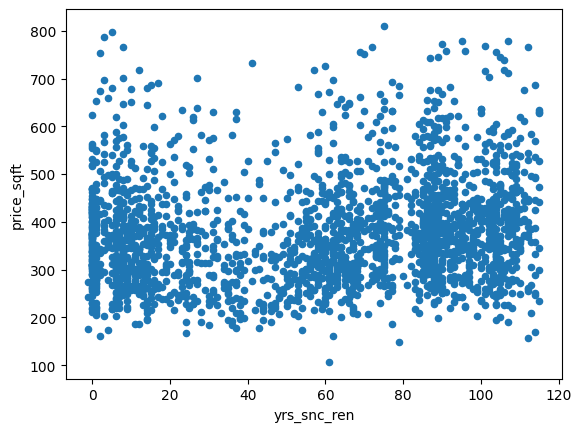

In [71]:
df_ren.plot.scatter(x='yrs_snc_ren', y='price_sqft')

In [73]:
df_ren[['yrs_snc_ren', 'price_sqft']].corr()

,yrs_snc_ren,price_sqft
yrs_snc_ren,1.000000,0.145271
price_sqft,0.145271,1.000000


### Further exploration, tbc: binning renovation dates into having happened in the last 10 years or longer ago

In [92]:
# plotting prices of within 10yrs renovated vs longer ago

df_ren['renovation_bin'] = pd.cut(
    df_ren['yrs_snc_ren'],
    bins=[-1, 11, 115],
    labels=['up to 10 years', 'more than 10 years'],
    include_lowest=True
)
df_ren

,yr_renovated,selling_price,sqft_living,selling_date,price_sqft,selling_year,yrs_snc_ren,renovation_bin
0,1900,783200.0,1590.0,2014-09-09,492.578616,2014,114,more than 10 years
1,1900,685000.0,2290.0,2015-02-18,299.126638,2015,115,more than 10 years
2,1900,700000.0,2420.0,2014-10-22,289.256198,2014,114,more than 10 years
3,1900,685000.0,1090.0,2015-05-12,628.440367,2015,115,more than 10 years
4,1900,1300000.0,2630.0,2014-07-01,494.296578,2014,114,more than 10 years
...,...,...,...,...,...,...,...,...
2250,2015,1490000.0,4430.0,2015-05-06,336.343115,2015,0,up to 10 years
2251,2015,805000.0,4600.0,2014-06-06,175.000000,2014,-1,up to 10 years
2252,2015,671000.0,1890.0,2015-04-21,355.026455,2015,0,up to 10 years
2253,2015,920000.0,2190.0,2015-04-24,420.091324,2015,0,up to 10 years


In [94]:
df_ren.renovation_bin.unique()

['more than 10 years', 'up to 10 years']
Categories (2, object): ['up to 10 years' < 'more than 10 years']

In [100]:
# get some data on whether renovation seems to have improved price/sqft
df_ren.groupby('renovation_bin')['price_sqft'].agg(['mean', 'std', 'count', 'median'])

/tmp/ipykernel_18621/953611629.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ren.groupby('renovation_bin')['price_sqft'].agg(['mean', 'std', 'count', 'median'])


,mean,std,count,median
renovation_bin,,,,
up to 10 years,372.793998,105.610108,434,361.998972
more than 10 years,382.227247,112.160829,1821,365.876777


The result so far seems that prc/sqft is higher for houses where the renovation has happened longer ago. Further investigations warranted.